In [185]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [186]:
df = pd.read_csv("../master_user_dataset.csv")
df.head()

,user_id,total_spend_2024,total_transactions_2024,total_spend_2025YTD,total_transactions_2025YTD,credit_line,current_balance,behavior_score,credit_score,is_high_income,...,payment_hist_13_24_credit_balance_months,payment_hist_13_24_normal_months,account_age_days,activation_delay_days,avg_transaction_size_2024,active_account_count,num_accounts,user_active_flag,utilization_pct,avg_monthly_spend_2024
0,003T5pQCItIgtB3eiTHDhUQEac0aMiNz,30779.72,72.0,16705.00,104.0,60.00,2.52150,754.0,788.0,1,...,0,12,NaN,NaN,427.496111,4,1,1,4.202500,2564.976667
1,009UZBOQTJzLpRuvrLRT6tnPDuWEwIHR,856.20,0.0,0.00,0.0,1.20,0.12000,13.0,650.0,0,...,0,2,NaN,NaN,0.000000,6,1,1,10.000000,71.350000
2,00nff4IIkr2nuiprhmPNNX1mCKtbhLR9,4926.00,0.0,2879.82,0.0,12.36,7.12709,660.0,652.0,0,...,0,9,NaN,NaN,0.000000,6,1,1,57.662540,410.500000
3,01HxVXdVo5bSQzPwNYJGH9m6hIGdhHx4,6483.72,120.0,1225.50,6.0,31.92,4.49235,4.0,568.0,0,...,0,0,NaN,NaN,54.031000,6,1,1,14.073778,540.310000
4,01JQvVz8oDo2m6lkE3TUbBPePrNK12n9,258521.70,1800.0,44441.52,258.0,79.20,9.76527,729.0,813.0,1,...,0,12,NaN,NaN,143.623167,6,1,1,12.329886,21543.475000


### Visualizing low income and high income

In [187]:
df.dtypes

user_id                                      object
total_spend_2024                            float64
total_transactions_2024                     float64
total_spend_2025YTD                         float64
total_transactions_2025YTD                  float64
credit_line                                 float64
current_balance                             float64
behavior_score                              float64
credit_score                                float64
is_high_income                                int64
has_fraud                                   float64
fraud_transaction_count                     float64
fraud_transaction_sum                       float64
fraud_case_count                            float64
fraud_transaction_max                       float64
fraud_transaction_min                       float64
fraud_transaction_avg                       float64
payment_hist_1_12_delinquency_count           int64
payment_hist_1_12_max_delinquency             int64
payment_hist

In [188]:
df.shape

(18033, 35)

In [189]:
df.columns

Index(['user_id', 'total_spend_2024', 'total_transactions_2024',
       'total_spend_2025YTD', 'total_transactions_2025YTD', 'credit_line',
       'current_balance', 'behavior_score', 'credit_score', 'is_high_income',
       'has_fraud', 'fraud_transaction_count', 'fraud_transaction_sum',
       'fraud_case_count', 'fraud_transaction_max', 'fraud_transaction_min',
       'fraud_transaction_avg', 'payment_hist_1_12_delinquency_count',
       'payment_hist_1_12_max_delinquency',
       'payment_hist_1_12_zero_balance_months',
       'payment_hist_1_12_credit_balance_months',
       'payment_hist_1_12_normal_months',
       'payment_hist_13_24_delinquency_count',
       'payment_hist_13_24_max_delinquency',
       'payment_hist_13_24_zero_balance_months',
       'payment_hist_13_24_credit_balance_months',
       'payment_hist_13_24_normal_months', 'account_age_days',
       'activation_delay_days', 'avg_transaction_size_2024',
       'active_account_count', 'num_accounts', 'user_active_fl

In [190]:
df_high_income = df[df["is_high_income"]==1]
df_low_income = df[df["is_high_income"]==0]

In [191]:
df_high_income.shape[0]

2999

In [192]:
df_low_income.shape[0]

15034

In [193]:
print("Metrics for high income accounts")
print(df_high_income.describe())

Metrics for high income accounts
       total_spend_2024  total_transactions_2024  total_spend_2025YTD  \
count      2.999000e+03              2999.000000         2.999000e+03   
mean       2.382037e+05              1768.552851         7.305803e+04   
std        2.291899e+05              1558.423465         6.781383e+04   
min       -6.966400e+02                 0.000000        -6.720000e+02   
25%        6.710001e+04               453.000000         2.413615e+04   
50%        1.928805e+05              1530.000000         5.848305e+04   
75%        3.357720e+05              2658.000000         1.010778e+05   
max        3.117749e+06             10668.000000         1.004904e+06   

       total_transactions_2025YTD  credit_line  current_balance  \
count                 2999.000000  2999.000000      2999.000000   
mean                   518.527509    90.444311        15.372888   
std                    428.182621    36.462003        16.793266   
min                      0.000000     0.0

In [194]:
print("Metrics for low income accounts")
print(df_high_income.describe())

Metrics for low income accounts
       total_spend_2024  total_transactions_2024  total_spend_2025YTD  \
count      2.999000e+03              2999.000000         2.999000e+03   
mean       2.382037e+05              1768.552851         7.305803e+04   
std        2.291899e+05              1558.423465         6.781383e+04   
min       -6.966400e+02                 0.000000        -6.720000e+02   
25%        6.710001e+04               453.000000         2.413615e+04   
50%        1.928805e+05              1530.000000         5.848305e+04   
75%        3.357720e+05              2658.000000         1.010778e+05   
max        3.117749e+06             10668.000000         1.004904e+06   

       total_transactions_2025YTD  credit_line  current_balance  \
count                 2999.000000  2999.000000      2999.000000   
mean                   518.527509    90.444311        15.372888   
std                    428.182621    36.462003        16.793266   
min                      0.000000     0.00

<Axes: xlabel='credit_score', ylabel='credit_line'>

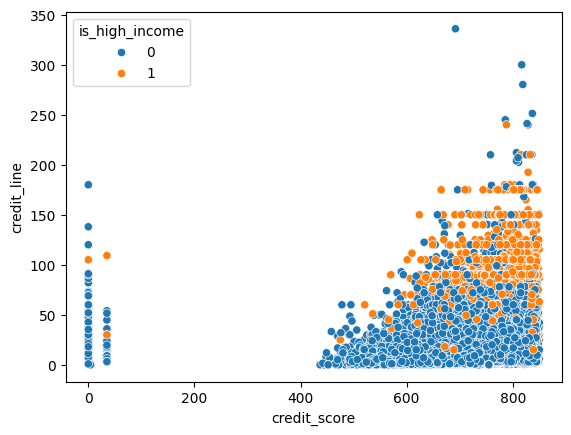

In [195]:
sns.scatterplot(x=df["credit_score"], y=df["credit_line"],hue=df["is_high_income"],data=df)

In [196]:
# Other distinctions:


### Visualizing any delinquency vs no delinquency

In [197]:
df_delinquency = df[(df["payment_hist_1_12_delinquency_count"]>=1) | (df["payment_hist_13_24_delinquency_count"] >= 1)]
df_delinquency

,user_id,total_spend_2024,total_transactions_2024,total_spend_2025YTD,total_transactions_2025YTD,credit_line,current_balance,behavior_score,credit_score,is_high_income,...,payment_hist_13_24_credit_balance_months,payment_hist_13_24_normal_months,account_age_days,activation_delay_days,avg_transaction_size_2024,active_account_count,num_accounts,user_active_flag,utilization_pct,avg_monthly_spend_2024
2,00nff4IIkr2nuiprhmPNNX1mCKtbhLR9,4926.00,0.0,2879.82,0.0,12.36,7.12709,660.0,652.0,0,...,0,9,NaN,NaN,0.000000,6,1,1,57.662540,410.500000
5,01Nobl3RlhBFSEnzPvmtOljwulRyx2Vm,20762.64,228.0,2178.00,0.0,10.20,4.86837,6.0,569.0,0,...,0,0,NaN,NaN,91.064211,6,1,1,47.729118,1730.220000
6,01Z6a85Da3bHfqyqGrcj5egWx5d7ZpgV,3215.75,30.0,710.60,10.0,0.80,0.40484,650.0,605.0,0,...,0,11,NaN,NaN,107.191667,5,1,1,50.605000,267.979167
8,025CwvzHRyvyvp3t9dSiNmQ4SLM2VxOX,5875.56,6.0,3390.00,0.0,9.90,5.69556,0.0,763.0,0,...,0,0,NaN,NaN,979.260000,3,1,1,57.530909,489.630000
11,02Kb4HWANwlEUWw4D5M67n1cmcJBjZcO,0.00,0.0,0.00,0.0,73.80,0.12000,12.0,779.0,0,...,0,2,NaN,NaN,0.000000,6,1,1,0.162602,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17983,zmy7UYsS535z2HZ86r9ePz1j0dLSuVle,33258.06,276.0,3336.84,0.0,31.20,31.05167,601.0,557.0,0,...,0,0,NaN,NaN,120.500217,6,1,1,99.524583,2771.505000
18000,zpPpTQFgwFpxzwcqlsn6qajubIBSea9x,0.00,0.0,0.00,0.0,6.92,0.12000,12.0,719.0,0,...,0,2,NaN,NaN,0.000000,6,1,1,1.734104,0.000000
18002,zqJjuHDOxBG5Ok10iASANNSAO2atl2oQ,5713.38,54.0,480.00,0.0,9.00,0.93486,6.0,728.0,0,...,0,0,NaN,NaN,105.803333,6,1,1,10.387333,476.115000
18006,zs4eqbZgVHZOOXLrZsljI2YqBNDjNPq9,10025.82,54.0,1470.00,0.0,14.70,14.54367,663.0,625.0,0,...,0,12,NaN,NaN,185.663333,6,1,1,98.936531,835.485000


In [198]:
delinquency_ids = list(df_delinquency["user_id"].unique())
delinquency_ids

['00nff4IIkr2nuiprhmPNNX1mCKtbhLR9',
 '01Nobl3RlhBFSEnzPvmtOljwulRyx2Vm',
 '01Z6a85Da3bHfqyqGrcj5egWx5d7ZpgV',
 '025CwvzHRyvyvp3t9dSiNmQ4SLM2VxOX',
 '02Kb4HWANwlEUWw4D5M67n1cmcJBjZcO',
 '02OywcvCuzErDGruGrrnRd1WjoALOsqF',
 '02zeAgdyGwqYbhLGZj2qWzVsypbYbhtN',
 '04Fm8lvRPMdPdG1gk89ZevSCS3aPJnXu',
 '05NMIEekxFw1dkHIeYCTsIq9VWHtBpU3',
 '05uRi3iHpfkGz3YSFHJToU8F33N5beUV',
 '07yP8tCOFbgPge9LlGKvflTUholXK6rc',
 '08xujtJDtslhwVgFPOfqqcEqZS6FeU0O',
 '0ACb1dTQuobir58aChu3XNhTTiqNnPiS',
 '0AQKjzW3motpMDN0molABVuz6uPvziUE',
 '0AiaN1yFeQcDQ0iRR3L4vIeQC8lQC6cd',
 '0BRWXFsrC4bLJXP4Yp9fRqN1QLjiVOKw',
 '0DYJXQZs16BbPMlVQQJPRZbljKeMrS1V',
 '0Enu4DGuNegzjxK9t6cEeAWNsNYPsRl2',
 '0FWSFP0A0GBL4b3ZrCuZC5mgFbYwT9yw',
 '0It14qLeNtNF7GEyyoyl9EvV9q21V3dl',
 '0IwtsMNMM4Hf771ctBUthahCPp3XkMys',
 '0KmcGJBgUEQHv8QdCZiYHlhEi3l1b0MF',
 '0LvzeVMfPxZL3x9BNQLED9VFTJHukC5h',
 '0N9kck3KYASzFf1Wtmq5luRIkIPV4XsH',
 '0OHPlEbGgwABcRM8spkTerWdwmV7Q5iF',
 '0Q3IcmWY9Uc60KY1AML3heubXTDIP8YT',
 '0QjmN63zPxJJOvzN6ratvu0GwehmOpRp',
 

In [199]:
df_no_delinquency = df[~df["user_id"].isin(delinquency_ids)]
df_no_delinquency

,user_id,total_spend_2024,total_transactions_2024,total_spend_2025YTD,total_transactions_2025YTD,credit_line,current_balance,behavior_score,credit_score,is_high_income,...,payment_hist_13_24_credit_balance_months,payment_hist_13_24_normal_months,account_age_days,activation_delay_days,avg_transaction_size_2024,active_account_count,num_accounts,user_active_flag,utilization_pct,avg_monthly_spend_2024
0,003T5pQCItIgtB3eiTHDhUQEac0aMiNz,30779.72,72.0,16705.00,104.0,60.00,2.52150,754.0,788.0,1,...,0,12,NaN,NaN,427.496111,4,1,1,4.202500,2564.976667
1,009UZBOQTJzLpRuvrLRT6tnPDuWEwIHR,856.20,0.0,0.00,0.0,1.20,0.12000,13.0,650.0,0,...,0,2,NaN,NaN,0.000000,6,1,1,10.000000,71.350000
3,01HxVXdVo5bSQzPwNYJGH9m6hIGdhHx4,6483.72,120.0,1225.50,6.0,31.92,4.49235,4.0,568.0,0,...,0,0,NaN,NaN,54.031000,6,1,1,14.073778,540.310000
4,01JQvVz8oDo2m6lkE3TUbBPePrNK12n9,258521.70,1800.0,44441.52,258.0,79.20,9.76527,729.0,813.0,1,...,0,12,NaN,NaN,143.623167,6,1,1,12.329886,21543.475000
7,01jTVGvvIys75zN5g3Uuu0DMOMNotK7M,0.00,0.0,0.00,0.0,1.60,0.08000,0.0,618.0,0,...,0,0,NaN,NaN,0.000000,4,1,1,5.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18027,zxshNeZeOg37Rppmpxxj7uv3lcA1n13Z,318781.38,2352.0,83816.10,606.0,90.00,15.79193,747.0,835.0,1,...,0,12,NaN,NaN,135.536301,6,1,1,17.546589,26565.115000
18029,zy9F9S3yuMOaVnkBdjWIXvFq3abH9vOk,0.00,0.0,0.00,0.0,0.00,0.00000,642.0,755.0,0,...,0,0,NaN,NaN,0.000000,1,1,1,6.004096,0.000000
18030,zyNkZYEiU8vpb3KmWW0xyjgSe1F9XpvA,5711.28,6.0,0.00,0.0,48.00,0.12000,13.0,749.0,0,...,0,0,NaN,NaN,951.880000,6,1,1,0.250000,475.940000
18031,zzJCWP33DpvwT3PiXeOObpERJJWkOvYJ,142973.40,1075.0,34076.50,280.0,125.00,4.66091,760.0,800.0,1,...,0,12,NaN,NaN,132.998512,5,1,1,3.728728,11914.450000


In [200]:
df_delinquency.describe()

,total_spend_2024,total_transactions_2024,total_spend_2025YTD,total_transactions_2025YTD,credit_line,current_balance,behavior_score,credit_score,is_high_income,has_fraud,...,payment_hist_13_24_credit_balance_months,payment_hist_13_24_normal_months,account_age_days,activation_delay_days,avg_transaction_size_2024,active_account_count,num_accounts,user_active_flag,utilization_pct,avg_monthly_spend_2024
count,2.919000e+03,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.0,...,2919.000000,2919.000000,0.0,0.0,2919.000000,2919.000000,2919.0,2919.0,2919.000000,2919.000000
mean,2.828531e+04,157.050702,8151.487859,44.962316,27.159741,6.842527,476.209318,685.918123,0.083248,1.0,...,0.169236,5.738609,NaN,NaN,571.554715,5.744433,1.0,1.0,32.323417,2357.109058
std,7.762997e+04,455.374604,24468.727832,141.974034,29.201090,11.630430,304.672833,111.714539,0.276304,0.0,...,0.749777,4.522640,NaN,NaN,1808.535622,1.132628,0.0,0.0,35.417727,6469.164325
min,-7.513680e+03,0.000000,-1567.240000,0.000000,0.000000,-1.003980,0.000000,0.000000,0.000000,1.0,...,0.000000,0.000000,NaN,NaN,-1252.280000,1.000000,1.0,1.0,-128.936000,-626.140000
25%,2.060390e+03,3.000000,211.500000,0.000000,6.600000,0.261000,13.000000,628.000000,0.000000,1.0,...,0.000000,0.000000,NaN,NaN,12.880833,6.000000,1.0,1.0,2.651321,171.699167
50%,7.614000e+03,21.000000,1666.140000,4.000000,17.400000,1.953920,644.000000,691.000000,0.000000,1.0,...,0.000000,6.000000,NaN,NaN,119.333793,6.000000,1.0,1.0,15.500318,634.500000
75%,2.077248e+04,90.000000,4390.290000,21.000000,38.105000,8.186635,688.000000,771.000000,0.000000,1.0,...,0.000000,10.000000,NaN,NaN,285.257250,6.000000,1.0,1.0,60.773963,1731.040000
max,1.654903e+06,5688.000000,356219.520000,1656.000000,336.000000,120.141470,772.000000,850.000000,1.000000,1.0,...,8.000000,12.000000,NaN,NaN,33174.000000,7.000000,1.0,1.0,142.231111,137908.550000


In [201]:
df_no_delinquency.describe()

,total_spend_2024,total_transactions_2024,total_spend_2025YTD,total_transactions_2025YTD,credit_line,current_balance,behavior_score,credit_score,is_high_income,has_fraud,...,payment_hist_13_24_credit_balance_months,payment_hist_13_24_normal_months,account_age_days,activation_delay_days,avg_transaction_size_2024,active_account_count,num_accounts,user_active_flag,utilization_pct,avg_monthly_spend_2024
count,1.511400e+04,15114.000000,1.511400e+04,15114.000000,15114.000000,15114.000000,15114.000000,15114.000000,15114.000000,15114.0,...,15114.000000,15114.000000,0.0,0.0,15114.000000,15114.000000,15114.000000,15114.0,15114.000000,15114.000000
mean,5.517057e+04,388.252349,1.655681e+04,113.443695,36.593637,6.049738,371.721384,724.642252,0.182347,1.0,...,0.121477,5.109633,NaN,NaN,543.860410,5.315337,1.000198,1.0,17.757137,4597.547361
std,1.368191e+05,984.154303,4.130553e+04,279.973336,37.367611,11.921931,351.849262,145.302747,0.386143,0.0,...,0.652425,5.295336,NaN,NaN,2780.840764,1.691152,0.014088,0.0,26.467576,11401.592628
min,-1.226430e+04,0.000000,-4.936242e+04,0.000000,0.000000,-7.879920,0.000000,0.000000,0.000000,1.0,...,0.000000,0.000000,NaN,NaN,-991.190000,1.000000,1.000000,1.0,-65.666000,-1022.025000
25%,0.000000e+00,0.000000,0.000000e+00,0.000000,8.400000,0.120000,12.000000,688.000000,0.000000,1.0,...,0.000000,0.000000,NaN,NaN,0.000000,6.000000,1.000000,1.0,1.000000,0.000000
50%,4.034400e+03,6.000000,1.159430e+03,1.000000,24.000000,0.656545,642.000000,764.000000,0.000000,1.0,...,0.000000,3.000000,NaN,NaN,67.416568,6.000000,1.000000,1.0,5.611523,336.200000
75%,2.913395e+04,120.000000,8.399500e+03,36.000000,54.000000,7.062335,719.000000,804.000000,0.000000,1.0,...,0.000000,12.000000,NaN,NaN,185.367350,6.000000,1.000000,1.0,21.592743,2427.828750
max,3.117749e+06,10668.000000,1.004904e+06,3720.000000,300.000000,213.570000,779.000000,850.000000,1.000000,1.0,...,12.000000,12.000000,NaN,NaN,129839.000000,13.000000,2.000000,1.0,126.479196,259812.415000


Text(0.5, 1.0, 'Credit Line for Accounts W/Delinquency in the Past 24mo')

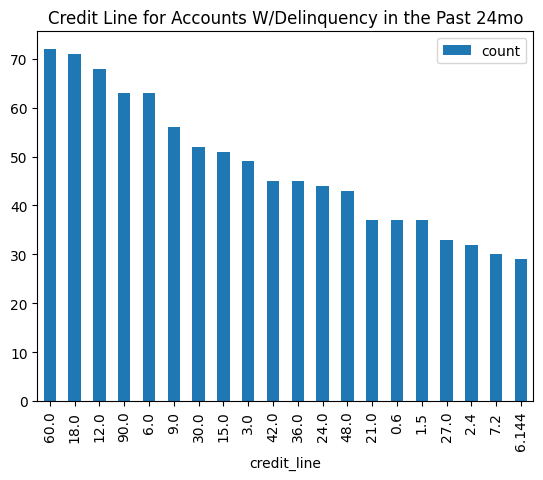

In [202]:
df_delinquency["credit_line"].value_counts(ascending=False).reset_index().head(20).plot.bar(x="credit_line",y="count")
plt.title("Credit Line for Accounts W/Delinquency in the Past 24mo")

Text(0.5, 1.0, 'Credit Line for Accounts W/No Delinquency in the Past 24mo')

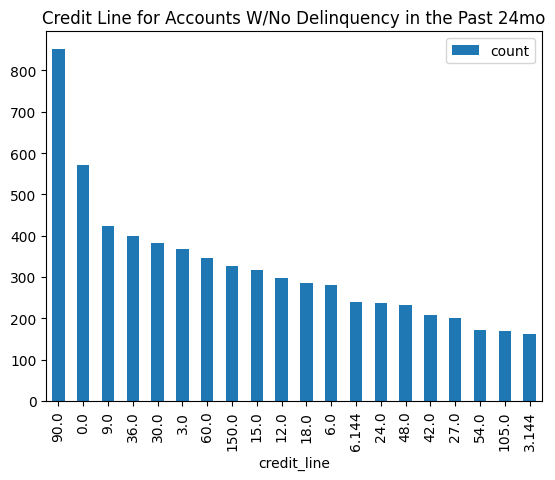

In [203]:
df_no_delinquency["credit_line"].value_counts(ascending=False).reset_index().head(20).plot.bar(x="credit_line",y="count")
plt.title("Credit Line for Accounts W/No Delinquency in the Past 24mo")

In [204]:
df.columns

Index(['user_id', 'total_spend_2024', 'total_transactions_2024',
       'total_spend_2025YTD', 'total_transactions_2025YTD', 'credit_line',
       'current_balance', 'behavior_score', 'credit_score', 'is_high_income',
       'has_fraud', 'fraud_transaction_count', 'fraud_transaction_sum',
       'fraud_case_count', 'fraud_transaction_max', 'fraud_transaction_min',
       'fraud_transaction_avg', 'payment_hist_1_12_delinquency_count',
       'payment_hist_1_12_max_delinquency',
       'payment_hist_1_12_zero_balance_months',
       'payment_hist_1_12_credit_balance_months',
       'payment_hist_1_12_normal_months',
       'payment_hist_13_24_delinquency_count',
       'payment_hist_13_24_max_delinquency',
       'payment_hist_13_24_zero_balance_months',
       'payment_hist_13_24_credit_balance_months',
       'payment_hist_13_24_normal_months', 'account_age_days',
       'activation_delay_days', 'avg_transaction_size_2024',
       'active_account_count', 'num_accounts', 'user_active_fl

In [205]:
del_cols = ["payment_hist_1_12_max_delinquency","payment_hist_13_24_max_delinquency"]

In [206]:
df["payment_hist_13_24_max_delinquency"].unique()

array([0, 1, 2, 3, 5])

In [207]:
df["delinquency"] = ((df["payment_hist_1_12_max_delinquency"]>=1) | (df["payment_hist_13_24_max_delinquency"]>=1))*1
df["delinquency"]

0        0
1        0
2        1
3        0
4        0
        ..
18028    1
18029    0
18030    0
18031    0
18032    0
Name: delinquency, Length: 18033, dtype: int64

### Visualizing 

In [208]:
df.columns

Index(['user_id', 'total_spend_2024', 'total_transactions_2024',
       'total_spend_2025YTD', 'total_transactions_2025YTD', 'credit_line',
       'current_balance', 'behavior_score', 'credit_score', 'is_high_income',
       'has_fraud', 'fraud_transaction_count', 'fraud_transaction_sum',
       'fraud_case_count', 'fraud_transaction_max', 'fraud_transaction_min',
       'fraud_transaction_avg', 'payment_hist_1_12_delinquency_count',
       'payment_hist_1_12_max_delinquency',
       'payment_hist_1_12_zero_balance_months',
       'payment_hist_1_12_credit_balance_months',
       'payment_hist_1_12_normal_months',
       'payment_hist_13_24_delinquency_count',
       'payment_hist_13_24_max_delinquency',
       'payment_hist_13_24_zero_balance_months',
       'payment_hist_13_24_credit_balance_months',
       'payment_hist_13_24_normal_months', 'account_age_days',
       'activation_delay_days', 'avg_transaction_size_2024',
       'active_account_count', 'num_accounts', 'user_active_fl

<Axes: xlabel='credit_score', ylabel='credit_line'>

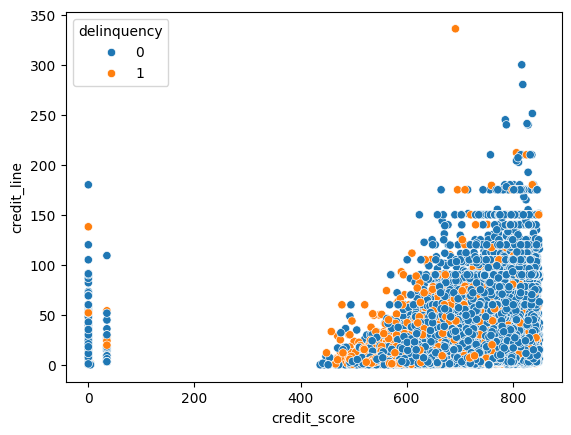

In [209]:
sns.scatterplot(x=df["credit_score"], y=df["credit_line"],hue=df["delinquency"],data=df)

In [211]:
df.select_dtypes(include=['float64', 'int64']).corrwith(df['total_spend_2025YTD'])

/Users/huaiyao/anaconda3/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/huaiyao/anaconda3/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


total_spend_2024                            0.872850
total_transactions_2024                     0.762678
total_spend_2025YTD                         1.000000
total_transactions_2025YTD                  0.808712
credit_line                                 0.591288
current_balance                             0.465730
behavior_score                              0.331435
credit_score                                0.170699
is_high_income                              0.659323
has_fraud                                        NaN
fraud_transaction_count                    -0.013796
fraud_transaction_sum                      -0.007875
fraud_case_count                           -0.015135
fraud_transaction_max                      -0.006878
fraud_transaction_min                      -0.001623
fraud_transaction_avg                      -0.004523
payment_hist_1_12_delinquency_count        -0.066918
payment_hist_1_12_max_delinquency          -0.072698
payment_hist_1_12_zero_balance_months      -0.